
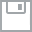
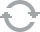
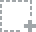
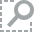
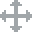
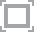
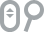
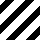
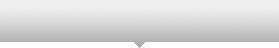
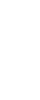
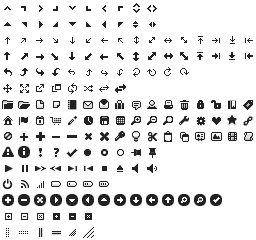
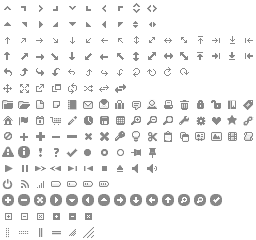
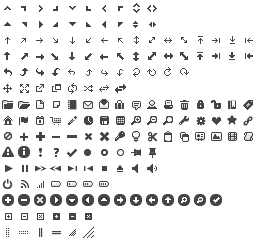
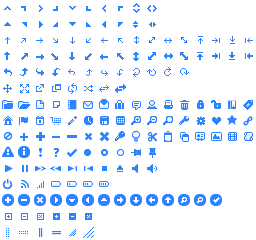
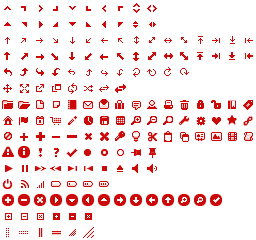
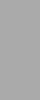
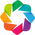
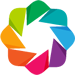

In [1]:
# Load standard libraries
import numpy as np
from pandas import DataFrame
from bokeh.plotting import figure, output_notebook, show, gridplot
from bokeh.models import ColumnDataSource, widgets, CustomJS
from bokeh.models.glyphs import Circle, Square
from bokeh.models import HoverTool

from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.io import output_file, show, vform, vplot, hplot

output_notebook()

In [2]:
# Load AssocPlots

from assocplots.misc import mock_data_generation

data = mock_data_generation(M=100000)

data1=data[0]
data1['pval'] /= 500000.*np.exp(-(data1['pos']-0.5*len(data1))**2/5.0)+1.
data2=data[1]

In [3]:
print(data1['snp'][0])
print(data1['pos'])

rs53883
[53883 67871 50524 ..., 96596 14993 86656]


In [8]:
from assocplots.interactive import *

cut1, cut2, data=data_reduce(data1, data2, N=1000)

data['pval1_q']

1991


array([  1.00000000e-05,   2.00000000e-05,   3.00000000e-05, ...,
         9.98940000e-01,   9.98940000e-01,   9.98940000e-01])

In [5]:
hoverq = HoverTool(
        tooltips=[
            ("snp", "@snp"),
            ("pos", "@pos"),
            ("-log10(pval1,pval2)", "(@pval1, @pval2)"),
        ]
    )
toolsq = []#['reset', 'wheel_zoom','box_select', hoverq]
ts = DataFrame({'snp': data['snp'], 
                    'pos': data['pos'], 
                    'pval1': -np.log10(data['pval1']), 
                    'pval1_q': -np.log10(data['pval1_q']), 
                    'pval1_q_top': -np.log10(data['pval1_q_top']), 
                    'pval1_q_bot': -np.log10(data['pval1_q_bot']), 
                    'pval2': -np.log10(data['pval2'])})
source = ColumnDataSource(data=ts)
p1 = figure(plot_width=400, plot_height=400, tools=toolsq, webgl=True)
r1 = p1.circle('pval1_q', 'pval1', source=source, line_color=None, size=10)
err_x = -np.log10(np.concatenate([data['pval1_q'][:100], data['pval1_q'][100::-1]]))
err_y = -np.log10(np.concatenate([data['pval1_q_top'][:100], data['pval1_q_bot'][100::-1]]))
r2 = p1.patch(err_x, err_y, alpha=0.2)
# show(p1)

In [6]:
print(data['pval2_q_bot'][:100])

[ 0.79163114  0.8731937   0.85972368  0.83836564  0.4621684   0.25386472
  0.29342237  0.12101747  0.2468734   0.29410432  0.67110255  0.39048225
  0.36324404  0.08457416  0.13428116  0.04977786  0.25594172  0.09794966
  0.73350294  0.66583638  0.17858824  0.43683644  0.87302184  0.93875381
  0.6855372   0.93406781  0.9441207   0.57579322  0.25510828  0.90469383
  0.4310179   0.5351838   0.819356    0.80251731  0.92838056  0.50298516
  0.05360971  0.24452639  0.9028405   0.04147845  0.87068271  0.13650904
  0.46092135  0.42385055  0.934025    0.72398787  0.54694653  0.41627619
  0.04209208  0.95327986  0.9298469   0.43518039  0.60006852  0.01747257
  0.15238916  0.54503754  0.68269493  0.89634456  0.28063117  0.56792713
  0.79773332  0.97690509  0.97853824  0.32987306  0.4786039   0.37102094
  0.91904088  0.71254504  0.26786032  0.85561919  0.85133452  0.62228312
  0.30106267  0.13485941  0.16950823  0.80176859  0.16937572  0.81635056
  0.30474536  0.3256263   0.12177438  0.00180039  0

In [7]:


p1,p2,p3,p4,pq1 = mann_only_interactive(data, cut1, cut2)
show(vplot(p1,p2))
show(hplot(pq1,p4))
show(p4)


